# **Trabajo Final Visión por Computador 2022-2**

<img src="http://agenciadenoticias.unal.edu.co/fileadmin/legacy/unal_full_36.jpg" width="300"/>

---
Grupo de Trabajo:
  - **Carlos Andrés Cuastumal Patiño**
  - **Juan David Builes Mendez**
  - **Carlos Andrés Perdomo Lozada**
---

# **Motivación**
La relevancia de las flores en el ecosistema consiste en su función como mecanismo de atracción para diferentes tipos de insectos y seres vivos, los cuales ayudan a polinizar, expandir y reproducir el ecosistema circundante.

El sector de las flores representa el segundo renglón de exportaciones agrícolas del país, después del café, en términos de valor. 
A continuación se mencionan algunas características representativas de las flores en Colombia:

*  Colombia es el segundo exportador mundial de flores, primer exportador de claveles y primer proveedor de los Estados Unidos.
*   Genera un importante ingreso de divisas al país con alrededor de 1.423 millones de dólares en 2019.
*   Aporta cerca del 17% del impuesto de renta del agro colombiano. 
*   Cerca del 95% de la producción se exporta. Es un sector que nació con enfoque en el mercado internacional. 
*   Representa cerca del 75% de la carga aérea nacional exportada, con entre 300 y 400 millones de dólares anuales en fletes aéreos. 
*   En la exportación marítima de flores, se consolida como líder a nivel mundial, con más del 6% del total exportado, llegando, entre otros, a destinos lejanos como Japón, Reino Unido y Australia. 

Datos obtenidos del ministerio de agricultura - 2020.

# **Metodología**

<img src="https://i.im.ge/2022/09/05/ORj0CK.vpc.png" width="500"/>

Algoritmos a evaluar: SVM, FR, KNN, CNN

## **Importación Librerias**

In [ ]:
#se importan las librerias a usar

#LIBRERIAS VARIAS
import numpy as np
import pandas as pd
import cv2
import os
import random
import random as rn
import shutil
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
from random import shuffle
from scipy import ndimage as ndi 
from mpl_toolkits.mplot3d import Axes3D
import io
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import cv2 as cv
import time
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

#SKLEARN
import sklearn
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#KERAS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.constraints import maxnorm
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

#Skimage
import skimage
from skimage import color
from skimage import io
from skimage.io import imread
from skimage.color import rgb2grey
from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.color import rgb2hsv









# **1) Adquisición de la Imágen**
<img src="https://i.im.ge/2022/09/05/ORtEEW.etapa1.png" width="500"/>



Para este caso se tomaron imagenes del repositorio de Kaggle. El link del dataset es el siguiente:

https://www.kaggle.com/datasets/imsparsh/flowers-dataset

Es un dataset que contiene 5 categorías de flores: Daisy (Margaritas), Dandelion (Dinete de león), Rose (rosas), Sunflower (girasoles) y Tulip (tulipanes). 

El dataset viene con datos de test (924 imágenes) y train (2746 imágenes), este último distribuido en las 5 categorías mencionadas: 501 imágenes Daisy, 646 imágenes Dandelion, 497 imágenes Rose, 495 imágenes de Sunflower y 607 imágenes Tulip. 

## **Revisión preliminar**
Las imágenes son de tipo fotográficas (posiblemente descargadas de la web) y de entornos muy variados. Se observan en ambientes abiertos (como cultivos, parques, lagos, jardines, entre otros), también en lugares cerrados (como casas o en floreros) o enfocadas (sin detallarse el entorno).

## **Filtrado del Dataset**
Antes de proceder a importar el dataset al notebook de trabajo, se realizó una revisión manual de cada una de las imágenes y se verificó que correspondieran a las categorías objetivo (que exista algún elemento dentro de la fotografía que contenga la flor), encontrandose varias novedades y siendo necesario la eliminación de imágenes que no correspondian y que podian agregar ruido.

Luego de filtrar, se depuraron 14 imágenes de la categoria rosa y 14 de la categoría tulipanes. Quedando finalmente un total de 2716 imágenes. Abajo las imágenes filtradas.

<img src="https://i.postimg.cc/YSQZdznq/filtro-inicial.png" width="500"/>

## **Descarga Dataset**

In [ ]:
#Luego de filtrado el dataset de manera manual en el explorador de windows, se cargó a un host (google drive) y se genera un link de descarga
#Mediante ese link se hace la descarga dataset (cargado en googledrive) a la sesión de trabajo actual
!gdown https://drive.google.com/u/0/uc?id=1IMJO_H5_G5BWX07J2qNnugkmVnIfP82-
!unzip -o Dataset.zip

Downloading...
From: https://drive.google.com/u/0/uc?id=1IMJO_H5_G5BWX07J2qNnugkmVnIfP82-
To: /content/Dataset.zip
100% 213M/213M [00:02<00:00, 76.1MB/s]
Archive:  Dataset.zip
  inflating: train/daisy/10140303196_b88d3d6cec.jpg  
  inflating: train/daisy/10172379554_b296050f82_n.jpg  
  inflating: train/daisy/10172567486_2748826a8b.jpg  
  inflating: train/daisy/10172636503_21bededa75_n.jpg  
  inflating: train/daisy/10391248763_1d16681106_n.jpg  
  inflating: train/daisy/10437754174_22ec990b77_m.jpg  
  inflating: train/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: train/daisy/10437929963_bc13eebe0c.jpg  
  inflating: train/daisy/10466290366_cc72e33532.jpg  
  inflating: train/daisy/10466558316_a7198b87e2.jpg  
  inflating: train/daisy/10555749515_13a12a026e.jpg  
  inflating: train/daisy/10555815624_dc211569b0.jpg  
  inflating: train/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: train/daisy/10559679065_50d2b16f6d.jpg  
  inflating: train/daisy/10712722853_5632165b04.jpg  
  

## **Creación de variables principales y Definición de categorías**

In [ ]:
#se crean 4 variables principales de trabajo. 
#2 que almacenaran labels: 1) en número y 2) en texto con el nombre completo
#2 que almacenaran los sets de imágenes: 1) entrenamiento y 2) test
def variables():
  global labels, labels_completos,imagenes_entrenamiento,imagenes_test,dir_categorias, dir_train, dir_test
  labels=[]
  labels_completos=[]
  imagenes_entrenamiento=[]
  imagenes_test=[]

  #variable auxiliar que almacenara el nombre de las categorias (tipos de flores), tendrán 5 categorias: 
  #0 - daisy (margaritas), 1- dandelion (diente de leon), 2- rose (rosas), 3- sunflower (girasol), 4- tulip (tulipanes)
  dir_categorias=[]

  #variables auxiliares con los directorios de los datos de entrenamiento y testeo
  dir_train='train/'
  dir_test='test/'

  #se asigna el nombre de las categorias como el listado de 
  #los nombres de las carpetas dentro de la carpeta de entrenamiento
  dir_categorias=os.listdir(dir_train)

variables()

## **Almacenamiento de imagenes y labels en variables (entrenamiento y test)**

In [ ]:
#se crean 2 ciclos for:
#1) recorre cada una de las carpetas dentro del directorio de entrenamiento
#2) recorre cada una de las imágenes de las carpetas anteriores
#y guarda el número de la categoría en la variable "labels" 
#y guarda la imágen como tal en la variable "imágenes"
text=''

tamaño=100 #imagenes de tamaño x tamaño

def flor(text):
        if text == 'daisy':
          num=0
        if text == 'dandelion':
          num=1
        if text == 'rose':
          num=2
        if text == 'sunflower':
          num=3
        if text == 'tulip':
          num=4
        return num

def flor2(num):
        if num == 0:
          text='daisy'
        if num == 1:
          text='dandelion'
        if num == 2:
          text='rose'
        if num == 3:
          text='sunflower'
        if num == 4:
          text='tulip'
        return text

  #ciclo para guardar imagenes de entrenamiento
def import_and_resize(dir_categorias,dir_train,tamaño):
  variables()
  global imagenes_entrenamiento,labels,imagenes_test
  x=0
  for directorio in dir_categorias:
      dir_imagenes=os.listdir(dir_train+directorio)
      for imagen in dir_imagenes:
          img=cv2.imread(dir_train+directorio+"/"+imagen)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          arr=Image.fromarray(img,'RGB')
          img_arr=arr.resize((tamaño,tamaño))
          imagenes_entrenamiento.append(np.array(img_arr))
          labels_completos.append(directorio)
          indice=flor(directorio)
          labels.append(indice)

      x+=1
  #ciclo para guardar imágenes de test
  x=0
  dir_test2=os.listdir(dir_test)
  for imagen in dir_test2:
        img=cv2.imread(dir_test+"/"+imagen)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        arr=Image.fromarray(img,'RGB')
        img_arr=arr.resize((tamaño,tamaño))
        imagenes_test.append(np.array(img_arr))
  x+=1
  imagenes_entrenamiento = np.array(imagenes_entrenamiento)
  imagenes_test=np.array(imagenes_test)
  labels=np.array(labels)

import_and_resize(dir_categorias,dir_train,tamaño)

## **Partición de entrenamiento en entrenamiento y validación**



In [ ]:
#partición de los datos de entrenamiento, en entrenamiento y validación
def particion(particion_val,imagenes_entrenamiento,labels):
  global imagenes_train,imagenes_val,labels_train,labels_val,imagenes_train2d,imagenes_val2d,labels_train2d,labels_val2d,labels_totales
  long=int(len(labels)*(1-particion_val))
  long2=int(len(labels)*(particion_val))+1
  imagenes_train,imagenes_val,labels_train,labels_val=train_test_split(imagenes_entrenamiento,labels,test_size=particion_val,random_state=0)

  #se convierten los datos de entrenamiento y validación en 2d (se usaran en los algoritmos de machine learning)
  imagenes_train2d=imagenes_train.reshape(long,tamaño*tamaño*3)
  imagenes_val2d=imagenes_val.reshape(long2,tamaño*tamaño*3)
  labels_train2d=labels_train.reshape(long,1)
  labels_val2d=labels_val.reshape(long2,1)



  labels_totales=[]
  for i in labels_train: labels_totales.append('Entrenamiento')
  for i in labels_val: labels_totales.append('Validacion')
  for i in imagenes_test: labels_totales.append('Test')

particion_val=0.2
particion(particion_val,imagenes_entrenamiento,labels)

## **Verificación de Cantidades**

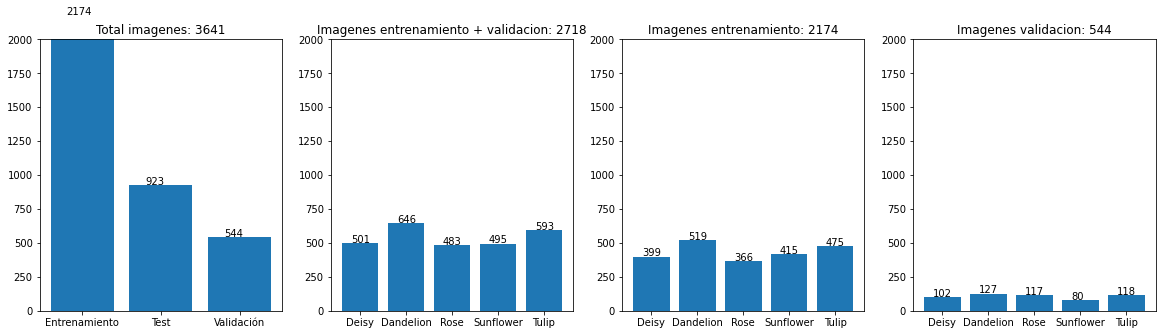

In [ ]:
#definicion de funcion para graficar
rows = 1
columns = 4
fig = plt.figure(figsize=(20, 5))  
def graficar_cantidades(data,num,texto,lbl):
  fig.add_subplot(rows, columns, num)
  etiquetas, counts = np.unique(data, return_counts=True)
  plt.bar(etiquetas, counts, align='center')
  plt.title(texto+ str(len(data)))
  plt.xticks(range(0,len(counts)), lbl)
  for i in range(len(counts)):
    plt.text(i-0.2,counts[i]+5,counts[i])
  ax = plt.gca()
  ax.set_ylim([0, 2000])


#graficas
graficar_cantidades(labels_totales,1,'Total imagenes: ',('Entrenamiento','Test','Validación'))
graficar_cantidades(labels_completos,2,'Imagenes entrenamiento + validacion: ',('Deisy','Dandelion','Rose','Sunflower','Tulip'))
graficar_cantidades(labels_train,3,'Imagenes entrenamiento: ',('Deisy','Dandelion','Rose','Sunflower','Tulip'))
graficar_cantidades(labels_val,4,'Imagenes validacion: ',('Deisy','Dandelion','Rose','Sunflower','Tulip'))
plt.show()

## **Verificación de imagenes almacenadas (entrenamiento y test)**

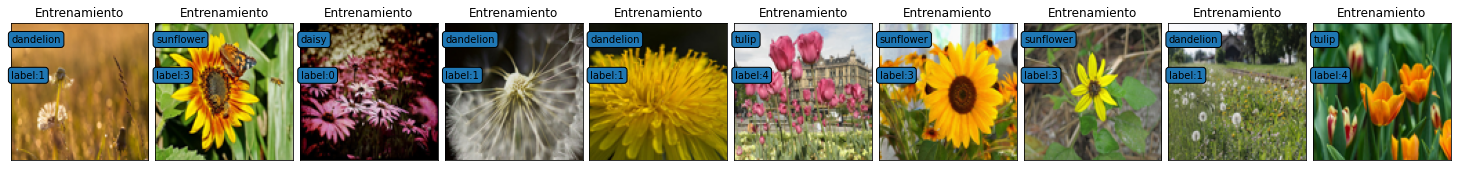

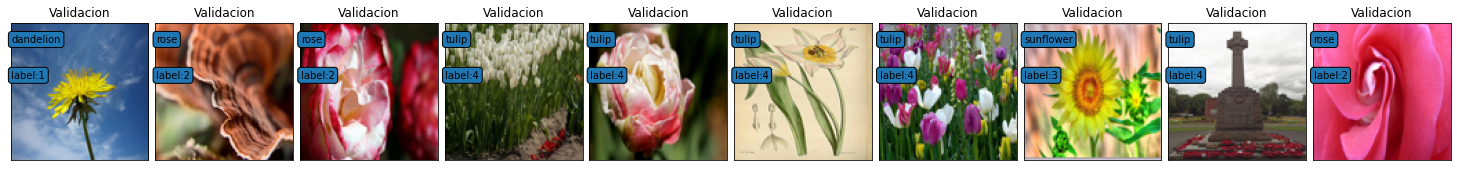

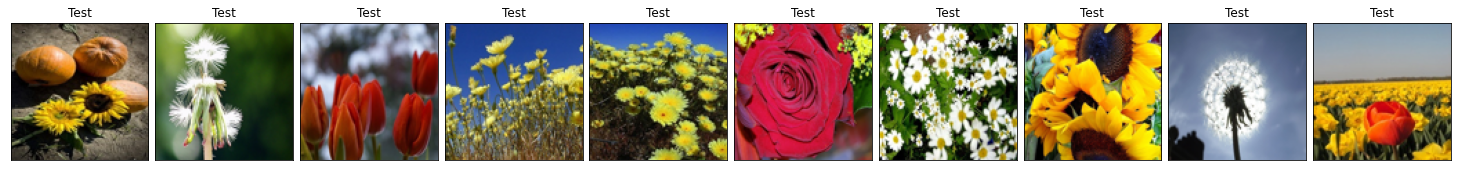

In [ ]:
#definicion de funcion para graficar
def print_entrenamiento(t,images,target,target2,top_n):
    fig=plt.figure(figsize=(20,20))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range (top_n):
      y=random.randint(0,len(images))
      p=fig.add_subplot(10,10,i+1, xticks=[], yticks=[])
      p.imshow(images[y])
      plt.title(t)
      if t=='Entrenamiento' or t=='Validacion':
        target2=flor2(target[y])
        p.text(0,14,str(target2),bbox=dict(boxstyle="round"))
        p.text(0,40,'label:'+str(target[y]),bbox=dict(boxstyle="round"))

#graficas
print_entrenamiento('Entrenamiento',imagenes_train,labels_train,labels_train,10)  
print_entrenamiento('Validacion',imagenes_val,labels_val,labels_val,10) 
print_entrenamiento('Test',imagenes_test,labels_val,labels_val,10) 

# **2) Preprocesamiento**
<img src="https://i.im.ge/2022/09/05/ORtYdT.etapa2.png" width="500"/>

El objetivo del preprocesamiento es mejorar la calidad y/o la apariencia de la imagen original para su análisis e interpretación.

## **Conversión en modos de color (RGB, BGR, GRAY, HSV, LAB)**

categorias:0)dandelion,1)daisy,2)sunflower,3)tulip,4)rose
Categoria seleccionada: tulip


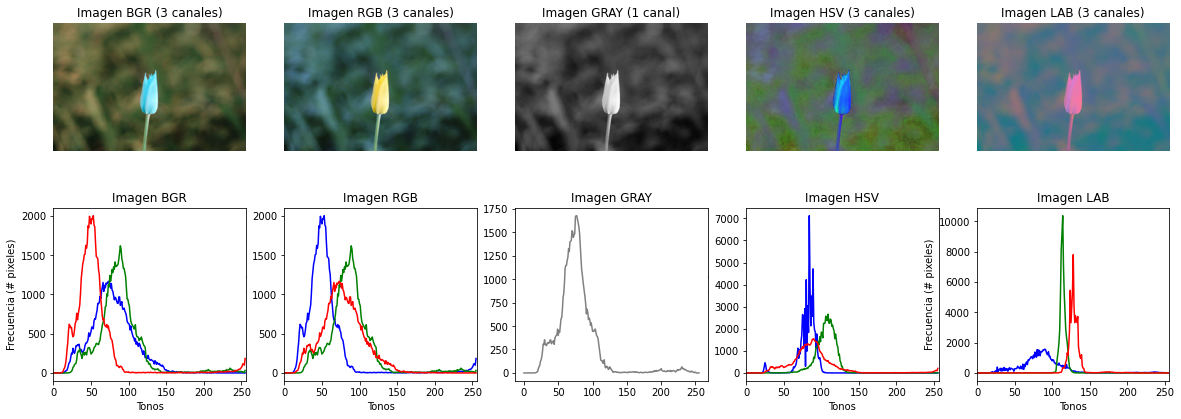

In [ ]:
categoria=3
dir_categorias=os.listdir('train/')
tipo=dir_categorias[categoria]
print('categorias:'+'0)'+dir_categorias[0]+',''1)'+dir_categorias[1]+',''2)'+dir_categorias[2]+',''3)'+dir_categorias[3]+',''4)'+dir_categorias[4])
print('Categoria seleccionada: '+tipo)
imagenes=os.listdir('train/'+str(tipo)+'/')
y=random.randint(0,len(imagenes))
img1=cv2.imread(dir_train+str(tipo)+'/'+imagenes[y])

rows = 2
columns = 5
fig = plt.figure(figsize=(20, 7))  

fig.add_subplot(rows, columns, 1)
imgbgr=img1
imgplot=imgbgr
plt.imshow(imgplot)
plt.axis('off')
plt.title('Imagen BGR (3 canales)')

fig.add_subplot(rows, columns, 2)
imgrgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imgplot=imgrgb
plt.imshow(imgplot)
plt.axis('off')
plt.title('Imagen RGB (3 canales)')

fig.add_subplot(rows, columns, 3)
imggray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
imgplot=imggray
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Imagen GRAY (1 canal)')

fig.add_subplot(rows, columns, 4)
imghsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
imgplot=imghsv
plt.imshow(imgplot)
plt.axis('off')
plt.title('Imagen HSV (3 canales)')

fig.add_subplot(rows, columns, 5)
imglab = cv2.cvtColor(img1, cv2.COLOR_BGR2LAB)
imgplot=imglab
plt.imshow(imgplot)
plt.axis('off')
plt.title('Imagen LAB (3 canales)')

##------------------------------

def graficar(imgplot,titulo):
  color = ('b','g','r')
  for i, c in enumerate(color):
      hist = cv2.calcHist([imgplot], [i], None, [256], [0, 256])
      plt.plot(hist, color = c)
      plt.xlim([0,256])
      plt.ylabel('Frecuencia (# pixeles)')
      plt.xlabel('Tonos')
      plt.title(titulo)

#rows = 1
#columns = 5
#fig = plt.figure(figsize=(30, 5))  

fig.add_subplot(rows, columns, 7)
graficar(imgrgb,'Imagen RGB')

fig.add_subplot(rows, columns, 6)
graficar(imgbgr,'Imagen BGR')

fig.add_subplot(rows, columns, 9)
graficar(imghsv,'Imagen HSV')

fig.add_subplot(rows, columns, 10)
graficar(imglab,'Imagen LAB')

fig.add_subplot(rows, columns, 8)
hist = cv2.calcHist([imggray], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')
plt.title('Imagen GRAY')

def convertir_color(imagenes_entrenamiento,color):
  global imagenes_entrenamiento2
  imagenes_entrenamiento2=[]
  num=len(labels)
  if color=='RGB':
    for i in range(num): imagenes_entrenamiento2.append(imagenes_entrenamiento[i])
  elif color=='BGR':
    for i in range(num): imagenes_entrenamiento2.append(cv2.cvtColor(imagenes_entrenamiento[i], cv2.COLOR_BGR2RGB))
  elif color=='HSV':
    for i in range(num): imagenes_entrenamiento2.append(cv2.cvtColor(imagenes_entrenamiento[i], cv2.COLOR_BGR2HSV))
  elif color=='LAB':
    for i in range(num): imagenes_entrenamiento2.append(cv2.cvtColor(imagenes_entrenamiento[i], cv2.COLOR_BGR2LAB))
  elif color=='GABOR':
    tamaño = 100 
    sigma = 5
    theta = 1*np.pi/2  
    lamda = 1*np.pi/4 
    gamma=0.9
    phi = 0.8 
    kernel = cv2.getGaborKernel((tamaño, tamaño), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    #cv2.filter2D(img, cv2.CV_8UC3, kernel)
    for i in range(num): imagenes_entrenamiento2.append(cv2.filter2D(imagenes_entrenamiento[i], cv2.CV_8UC3, kernel))

## **Ecualización de Imagen**

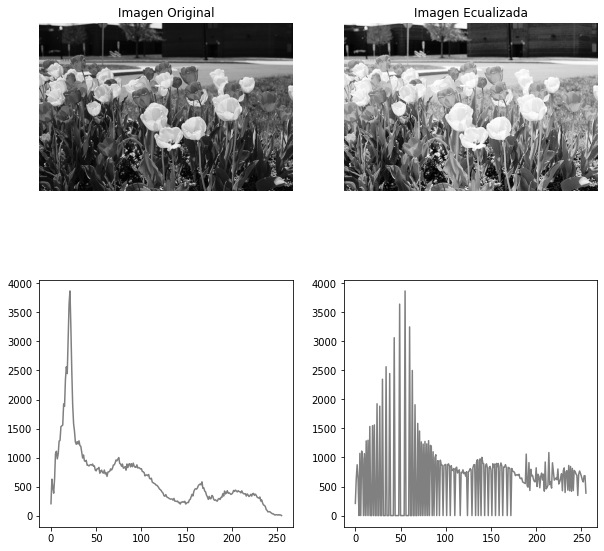

In [ ]:
y=random.randint(0,len(imagenes))
img1=cv2.imread(dir_train+str(tipo)+'/'+imagenes[y])

rows = 2
columns = 2
fig = plt.figure(figsize=(10, 10))  

fig.add_subplot(rows, columns, 1)
imggray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
imgplot=imggray
plt.imshow(imgplot, cmap = plt.cm.gray)
plt.axis('off')
plt.title('Imagen Original')

fig.add_subplot(rows, columns, 3)
hist = cv2.calcHist([imggray], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

fig.add_subplot(rows, columns, 2)
imggray = cv2.equalizeHist(imggray)
imgplot=imggray
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Imagen Ecualizada')

fig.add_subplot(rows, columns, 4)
hist = cv2.calcHist([imggray], [0], None, [256], [0, 256])
plt.plot(hist, color='gray')

#graficar(imgrgb,'Imagen RGB')

#fig.add_subplot(rows, columns, 2)
#graficar(equ,'Histograma Ecualizado')

## **Operaciones (suma, resta, multiplicación)**

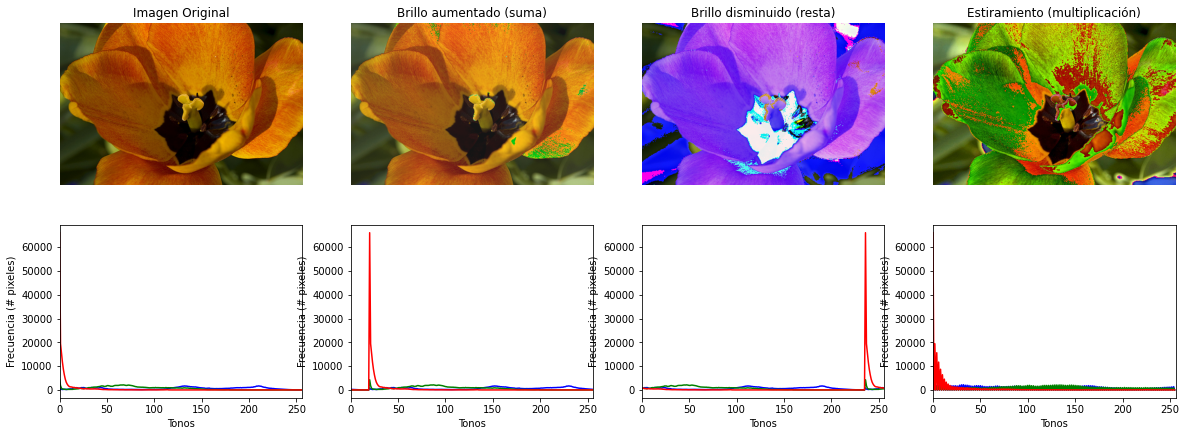

In [ ]:
categoria=3
dir_categorias=os.listdir('train/')
tipo=dir_categorias[categoria]
imagenes=os.listdir('train/'+str(tipo)+'/')
#y=random.randint(0,len(imagenes))
y=3
img1=cv2.imread(dir_train+str(tipo)+'/'+imagenes[y])

rows = 2
columns = 4
fig = plt.figure(figsize=(20, 7))  

fig.add_subplot(rows, columns, 1)
imgor = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
imgplot=imgor
plt.imshow(imgplot)
plt.axis('off')
plt.title('Imagen Original')

fig.add_subplot(rows, columns, 5)
graficar(imgplot,'')

fig.add_subplot(rows, columns, 2)
img = imgor+20
imgplot=img
plt.imshow(imgplot)
plt.axis('off')
plt.title('Brillo aumentado (suma)')

fig.add_subplot(rows, columns, 6)
graficar(imgplot,'')

fig.add_subplot(rows, columns, 3)
img = imgor-20
imgplot=img
plt.imshow(imgplot)
plt.axis('off')
plt.title('Brillo disminuido (resta)')

fig.add_subplot(rows, columns, 7)
graficar(imgplot,'')

fig.add_subplot(rows, columns, 4)
img = imgor*2
imgplot=img
plt.imshow(imgplot)
plt.axis('off')
plt.title('Estiramiento (multiplicación)')

fig.add_subplot(rows, columns, 8)
graficar(imgplot,'')

## **Aumentación**

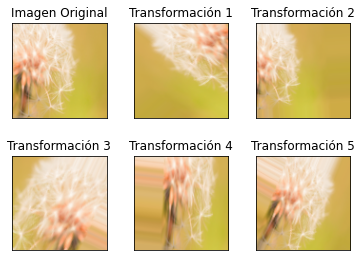

In [ ]:
#funcion para generar aumentación en un dataset de entrada
def aumentacion(imagenes_entrenamiento,trans,ln):
  global imagenes_entrenamiento_aum,labels_aum
  datagen = ImageDataGenerator(
          rotation_range=50,
          width_shift_range=0.3,
          height_shift_range=0.3,
          shear_range=0.3,
          zoom_range=0.3,
          horizontal_flip=True,
          fill_mode='nearest')

  transformaciones=trans
  x=imagenes_entrenamiento[0]
  imagenes_entrenamiento_aum = x.reshape((1,) + x.shape)
  labels_aum = []
  labels_aum.append(labels[0])
  for i in range(ln):
    x=imagenes_entrenamiento[i]
    y=labels[i]
    x = x.reshape((1,) + x.shape)
    pic = datagen.flow(x, batch_size =1)
    imagenes_entrenamiento_aum=np.concatenate((imagenes_entrenamiento_aum, x), axis=0)
    labels_aum.append(y)
    for i in range(transformaciones):
      batch = pic.next()
      image_ = batch[0].astype('uint8')
      image_ = image_.reshape((1,) + image_.shape)
      imagenes_entrenamiento_aum=np.concatenate((imagenes_entrenamiento_aum, image_), axis=0)
      labels_aum.append(y)

def aumentacion_2(imagenes_entrenamiento,trans,aum,particion_val,tamaño,ln):
  global imagenes_train, imagenes_train2d,labels_train2d,labels_train,labels
  if aum=='Si':
    aumentacion(imagenes_entrenamiento,trans,ln)
    imagenes_train=imagenes_entrenamiento_aum
    labels_train2d=labels=np.array(labels_aum)
    labels_train=labels_train2d
    imagenes_train2d=imagenes_train.reshape(len(imagenes_train),tamaño*tamaño*3)
  else:
    particion(particion_val,imagenes_entrenamiento,labels)

aumentacion_2(imagenes_entrenamiento,5,'Si',0.3,100,100)
num3=np.arange(1,7,1)
fig=plt.figure(figsize=(5,5))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.4, wspace=0.05)
ii=1
for i in num3:
  plt.subplot(3, 3, ii,xticks=[], yticks=[])
  if ii==1:
    titulo='Imagen Original'
  else:
    titulo='Transformación '+ str(ii-1)
  plt.title(titulo)
  plt.imshow(imagenes_train[i])
  ii=ii+1
plt.show()

# **3) Segmentación**
<img src="https://i.im.ge/2022/09/05/ORtW8a.etapa3.png" width="500"/>

Las Segmentación es la partición de una imagen en regiones homogéneas con respecto a una o más características.

2174


Text(0.5, 1.0, 'Imagen Segmentada')

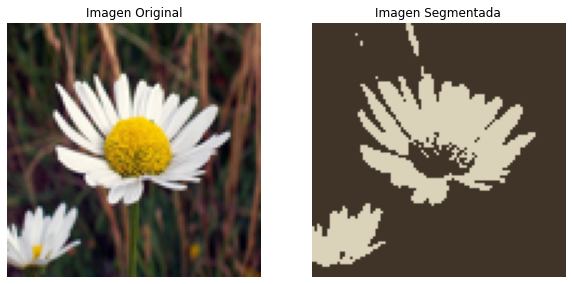

In [ ]:
#funcion para segmentar imagen
def segmentar(im,k):
  Z = im.reshape((-1,3))
  Z = np.float32(Z) 
  criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  ret,label,center=cv.kmeans(Z,k,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  res2 = res.reshape((im.shape))
  return res2

#funcion para segmentar dataset de entrada
def segmentar2(im,labels_train2d,val,seg):
  global dat_seg,imagenes_train,particion_val,imagenes_entrenamiento,labels,tamaño
  dat_seg=[]
  ln=len(labels_train2d)
  print(ln)
  for i in np.arange(0,ln,1):
    im_seg=segmentar(im[i],val)
    dat_seg.append(np.array(im_seg))
  dat_seg=np.array(dat_seg)
  if seg=='Si':
    imagenes_train=dat_seg
    imagenes_train2d=imagenes_train.reshape(ln,tamaño*tamaño*3)
  else:
    particion(particion_val,imagenes_entrenamiento,labels)

segmentar2(imagenes_train,labels_train2d,2,'No')

#ejemplo
n=1
rows = 1
columns = 2
fig = plt.figure(figsize=(10, 10))  
fig.add_subplot(rows, columns, 1)
plt.imshow(imagenes_train[n])
plt.axis('off')
plt.title('Imagen Original')

fig.add_subplot(rows, columns, 2)
plt.imshow(dat_seg[n])
plt.axis('off')
plt.title('Imagen Segmentada')

# **4) Extracción de características**
<img src="https://i.im.ge/2022/09/05/ORtfxS.etapa4.png" width="500"/>


## **Extracción de componentes princiaples**

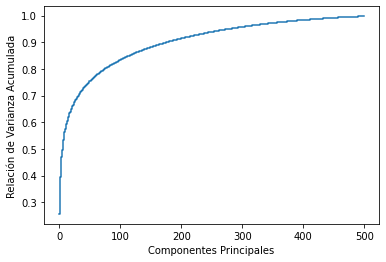

Se redujeron las dimensiones de  (2174, 500)  a  (544, 500)


In [ ]:
def funcion_pca(varianza,imagenes):
  global imagenes_train2d_pca,cum_sum_eigenvalues
  pca = PCA(n_components=varianza)
  imagenes_train2d_pca = pca.fit_transform(imagenes)
  exp_var_pca = pca.explained_variance_ratio_
  cum_sum_eigenvalues = np.cumsum(exp_var_pca)
  return imagenes_train2d_pca

imagenes_train2d=funcion_pca(500,imagenes_train2d)
imagenes_val2d=funcion_pca(500,imagenes_val2d)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Relación de Varianza Acumulada')
plt.xlabel('Componentes Principales')
plt.show()
print('Se redujeron las dimensiones de ',imagenes_train2d.shape,' a ',imagenes_train2d_pca.shape)

## **Gráfica de los 2 componentes principales**

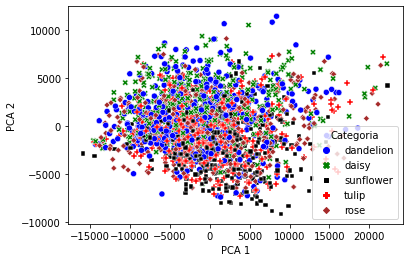

In [ ]:
pca = PCA(n_components=2)
dataIn2D = pca.fit_transform(imagenes_train2d)
x=dataIn2D[:,0]
y=dataIn2D[:,1]
z=labels_train2d[:,0]
z2=[]
for i in np.arange(0,len(z),1):
  z2.append(flor2(z[i]))

df = pd.DataFrame({'PCA 1':x,'PCA 2':y,'Categoria':z2})
sns.scatterplot(data=df, hue='Categoria', x='PCA 1', y='PCA 2',style="Categoria",palette=['blue','green','black','red','brown'])
plt.show()

# **5) Reconocimiento de Patrones**
<img src="https://i.postimg.cc/63JgkBYK/etapa5.png" width="500"/>

Se evaluan algoritmos de machine learning: KNN, RF, SVM, CNN

In [ ]:
#funciones para evaluar y entrenar modelo
def matriz_confusion(y_val,y_pred_val,model):
  cnf1 = confusion_matrix(y_val,y_pred_val)
  cnf = cnf1.astype('float') / cnf1.sum(axis=1)[:, np.newaxis]

  group_percentages = ["{0:.2%}".format(value) for value in cnf.flatten()]
  group_counts = ["{0:0.0f}".format(value) for value in cnf1.flatten()]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(5,5)


  df_cnf = pd.DataFrame(cnf, ('Daisy','Dandelion','Rose','Sunflower','Tulip'), ('Daisy','Dandelion','Rose','Sunflower','Tulip'))
  sns.heatmap(df_cnf, annot = labels,vmin=0, vmax=1,fmt="")
  plt.title(model)
  plt.xlabel('Predicciones')
  plt.ylabel('Reales')

def train_and_evaluate(clf,X_train,X_val,y_train,y_val,model):
  start = time.time()
  clf.fit(X_train,y_train)
  print("Accuracy on training set:")
  print(clf.score(X_train,y_train))
  print("Accuracy on validation set:")
  a=clf.score(X_val,y_val)
  print(a)
  y_pred_val = clf.predict(X_val)
  end = time.time()
  tiempo=end-start
  titulo=model+' (Acc. '+str(round(a*100, 2))+'%)'+' ('+str(round(tiempo,2))+' seg)'
  matriz_confusion(y_val,y_pred_val,titulo)
  print(sklearn.metrics.classification_report(y_true= y_val, y_pred= y_pred_val))

def train(clf,X_train,y_train):
  global time_train
  start = time.time()
  clf.fit(X_train,y_train)
  end = time.time()
  time_train=end-start

def evaluate(clf,X_val,y_val,model):
  global time_train
  start = time.time()
  #a=clf.score(X_val,y_val)
  y_pred_val = clf.predict(X_val)
  a=sklearn.metrics.f1_score(y_true=y_val, y_pred= y_pred_val,average='weighted')
  end = time.time()
  tiempo=end-start+time_train
  titulo=model+' (f1 '+str(round(a*100, 2))+'%)'+' ('+str(round(tiempo,2))+' seg)'
  matriz_confusion(y_val,y_pred_val,titulo)

def train_cnn(imagenes_train, labels_train2d,imagenes_val,labels_val2d,epochs,batch_size,tamaño):
  global time_train
  start = time.time()
  compilar_cnn(tamaño)
  History = cnn.fit(imagenes_train, labels_train2d, epochs=epochs, batch_size=batch_size, validation_data=(imagenes_val, labels_val2d),verbose=0)
  end = time.time()
  time_train=end-start

def evaluate_cnn(imagenes_val,labels_val):
  global time_train
  start = time.time()
  y_pred_val = cnn.predict(imagenes_val)
  y_pred_val=np.argmax(y_pred_val,axis=1)
  a=sklearn.metrics.f1_score(y_true=labels_val, y_pred= y_pred_val,average='weighted')
  end = time.time()
  tiempo=end-start+time_train
  titulo='Convolutional Neural Network'+' (f1 '+str(round(a*100, 2))+'%)'+' ('+str(round(tiempo,2))+' seg)'
  matriz_confusion(labels_val,y_pred_val,titulo)

## **SVM (Support Vector Machine)**



In [ ]:
#definición del modelo
svm=SVC(kernel="rbf")

#train_and_evaluate(svm,imagenes_train2d,imagenes_val2d,labels_train,labels_val,'SVM')

## **RF (Random Forest)**

In [ ]:
#definicion del modelo
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

#train_and_evaluate(rf,imagenes_train2d,imagenes_val2d,labels_train,labels_val, 'Random Forest')

## **KNN (K-Nearest Neighbor)**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
#train_and_evaluate(knn,imagenes_train2d,imagenes_val2d,labels_train,labels_val,'K-Nearest Neighbor')

## **CNN (Convolutional Neural Network)**

In [ ]:
def compilar_cnn(tamaño):
  global cnn
  cnn = Sequential()
  cnn.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (tamaño,tamaño,3)))
  cnn.add(MaxPooling2D(pool_size=(2,2)))
  cnn.add(Dropout(0.01))

  cnn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  cnn.add(Dropout(0.01))

  cnn.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  cnn.add(Dropout(0.01))

  cnn.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  cnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  cnn.add(Dropout(0.01))

  cnn.add(Flatten())
  cnn.add(Dense(512))
  cnn.add(Activation('relu'))
  cnn.add(Dense(5, activation = "softmax"))

  cnn.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#train_cnn(imagenes_train, labels_train2d,imagenes_val,labels_val2d,10,128)
#evaluate_cnn(imagenes_val,labels_val)
#y_pred_val = cnn.predict(imagenes_val)
#y_pred_val=np.argmax(y_pred_val,axis=1)
#print(sklearn.metrics.classification_report(y_true= labels_val, y_pred= y_pred_val))

# **Experimentos**
Tomando en cuenta los 5 pasos anteriormente definidos se compilan a continuación, para realizar las diferentos experimentos y sensibilidades

In [ ]:
#las funciones de abajo entrenan y evaluan los modelos de acuerdo a las imágenes de entrada anteriomente definidas
def experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño):
  rows = 2
  columns = 2
  fig = plt.figure(figsize=(15, 10))  
  fig.add_subplot(rows, columns, 1)
  train(rf,imagenes_train2d,labels_train)
  evaluate(rf,imagenes_val2d,labels_val,'Random Forest')

  fig.add_subplot(rows, columns, 2)
  train(knn,imagenes_train2d,labels_train)
  evaluate(knn,imagenes_val2d,labels_val,'K-Nearest Neighbor')

  fig.add_subplot(rows, columns, 3)
  train(svm,imagenes_train2d,labels_train)
  evaluate(svm,imagenes_val2d,labels_val,'Support Vector Machine')

  fig.add_subplot(rows, columns, 4)
  train_cnn(imagenes_train, labels_train2d,imagenes_val,labels_val2d,100,128,tamaño)
  evaluate_cnn(imagenes_val,labels_val)

  plt.show()

## **Experimento 1**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


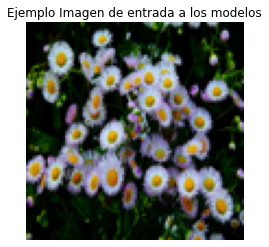

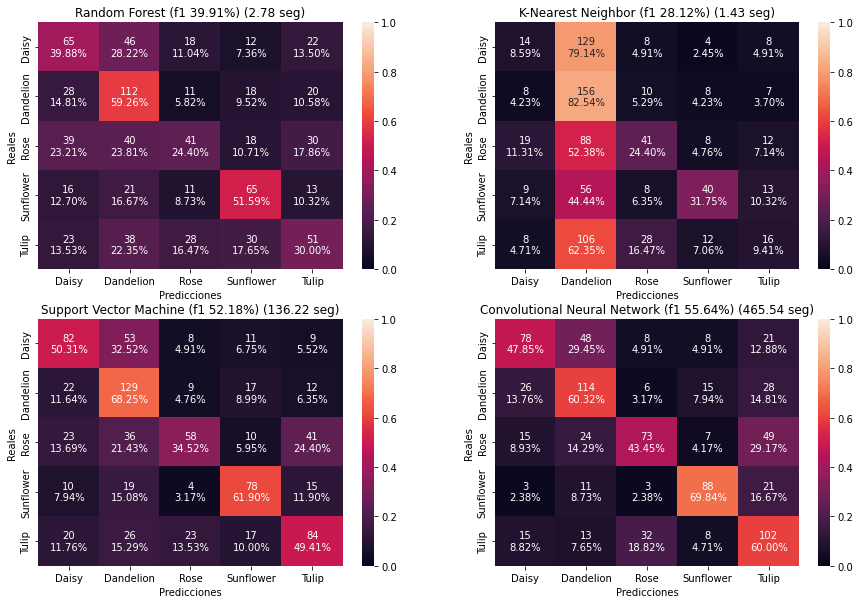

In [ ]:
#######################################
#funciones para importar y modificar las imágenes de entrada de los modelos
tamaño=100
import_and_resize(dir_categorias,dir_train,tamaño) #importar imagenes de un tamaño definido
#######################################
#funcion para definir colores RGB, BGR, HSV, LAB o filtros GABOR
color='RGB'
convertir_color(imagenes_entrenamiento,color)
#######################################
#funcion para realizar partición entrenamiento y validación
part=0.3
particion(part,imagenes_entrenamiento,labels)
#######################################
#funcion para realizar aumentacion
#trans=5 #cantidad de transformaciones en la aumentación
#aument='No'
#ln=100 #len(imagenes_train)
#aumentacion_2(imagenes_entrenamiento,trans,aument,part,tamaño,ln) #aumentacion de datos
#######################################
#funcion para reducir dimensiones
#extr_car='No'
#num_car=500
#if extr_car=='Si': #reduccion de dimensionones
#  imagenes_train2d=funcion_pca(num_car,imagenes_train2d)
#  imagenes_val2d=funcion_pca(num_car,imagenes_val2d) 
#######################################
#funcion para realizar segmentacion
#segment='No'
#segmentar2(imagenes_train,labels_train2d,2,segment)

#####################################
#gráfica de imagen de muestra luego de las condiciones anteriores
imgplot=imagenes_train[1]
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Ejemplo Imagen de entrada a los modelos')

########################################
#funcion para evaluar modelos
experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño)

## **Experimento 2**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


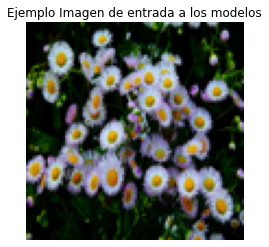

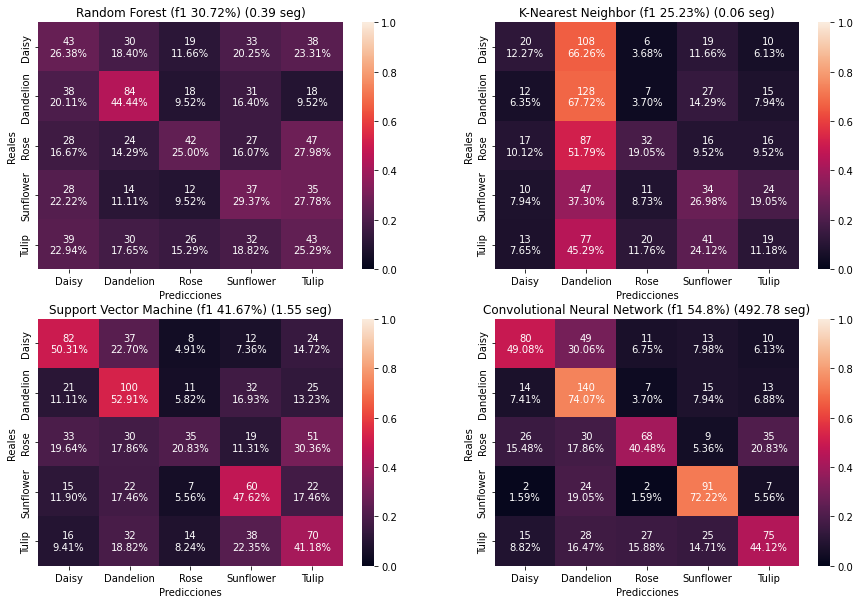

In [ ]:
#######################################
#funciones para importar y modificar las imágenes de entrada de los modelos
tamaño=100
import_and_resize(dir_categorias,dir_train,tamaño) #importar imagenes de un tamaño definido
#######################################
#funcion para definir colores RGB, BGR, HSV, LAB o filtros GABOR
color='RGB'
convertir_color(imagenes_entrenamiento,color)
#######################################
#funcion para realizar partición entrenamiento y validación
part=0.3
particion(part,imagenes_entrenamiento,labels)
#######################################
#funcion para realizar aumentacion
#trans=5 #cantidad de transformaciones en la aumentación
#aument='No'
#ln=100 #len(imagenes_train)
#aumentacion_2(imagenes_entrenamiento,trans,aument,part,tamaño,ln) #aumentacion de datos
#######################################
#funcion para reducir dimensiones
extr_car='Si'
num_car=500
if extr_car=='Si': #reduccion de dimensionones
  imagenes_train2d=funcion_pca(num_car,imagenes_train2d)
  imagenes_val2d=funcion_pca(num_car,imagenes_val2d)
#######################################
#funcion para realizar segmentacion
#segment='No'
#segmentar2(imagenes_train,labels_train2d,2,segment)

#####################################
#gráfica de imagen de muestra luego de las condiciones anteriores
imgplot=imagenes_train[1]
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Ejemplo Imagen de entrada a los modelos')

########################################
#funcion para evaluar modelos
experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño)

## **Experimento 3**

1902


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


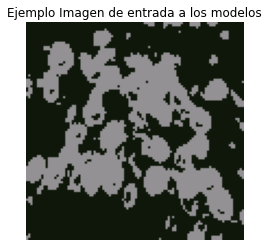

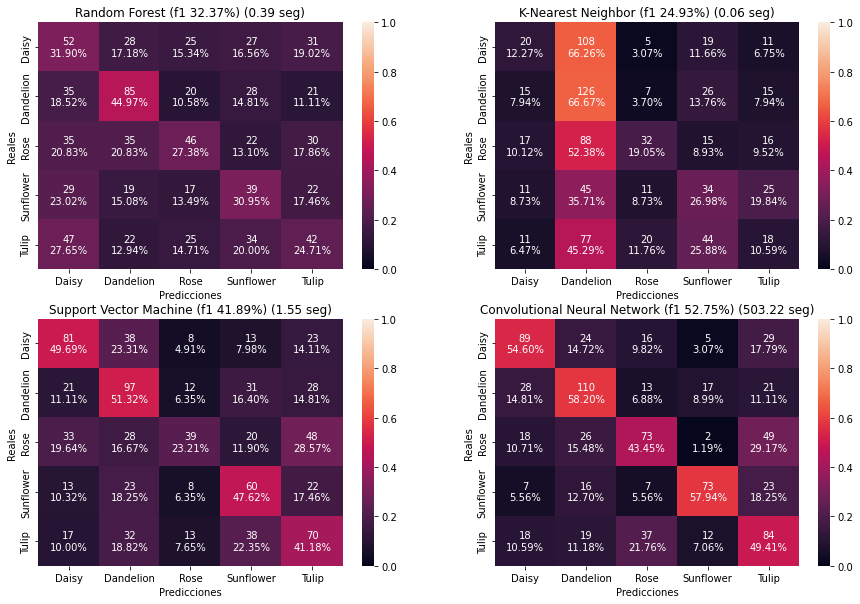

In [ ]:
#######################################
#funciones para importar y modificar las imágenes de entrada de los modelos
tamaño=100
import_and_resize(dir_categorias,dir_train,tamaño) #importar imagenes de un tamaño definido
#######################################
#funcion para definir colores RGB, BGR, HSV, LAB o filtros GABOR
color='RGB'
convertir_color(imagenes_entrenamiento,color)
#######################################
#funcion para realizar partición entrenamiento y validación
part=0.3
particion(part,imagenes_entrenamiento,labels)
#######################################
#funcion para realizar aumentacion
#trans=5 #cantidad de transformaciones en la aumentación
#aument='Si'
#ln=2718 #len(imagenes_train) #len(imagenes_train)
#aumentacion_2(imagenes_entrenamiento,trans,aument,part,tamaño,ln) #aumentacion de datos
#######################################
#funcion para reducir dimensiones
extr_car='Si'
num_car=500
if extr_car=='Si': #reduccion de dimensionones
  imagenes_train2d=funcion_pca(num_car,imagenes_train2d)
  imagenes_val2d=funcion_pca(num_car,imagenes_val2d)
#######################################
#funcion para realizar segmentacion
#segment='Si'
#segmentar2(imagenes_train,labels_train2d,2,segment)

#####################################
#gráfica de imagen de muestra luego de las condiciones anteriores
imgplot=imagenes_train[1]
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Ejemplo Imagen de entrada a los modelos')

########################################
#funcion para evaluar modelos
experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño)

## **Experimento 4**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


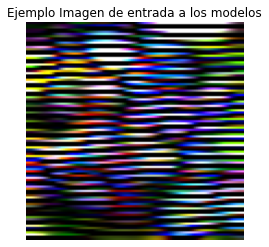

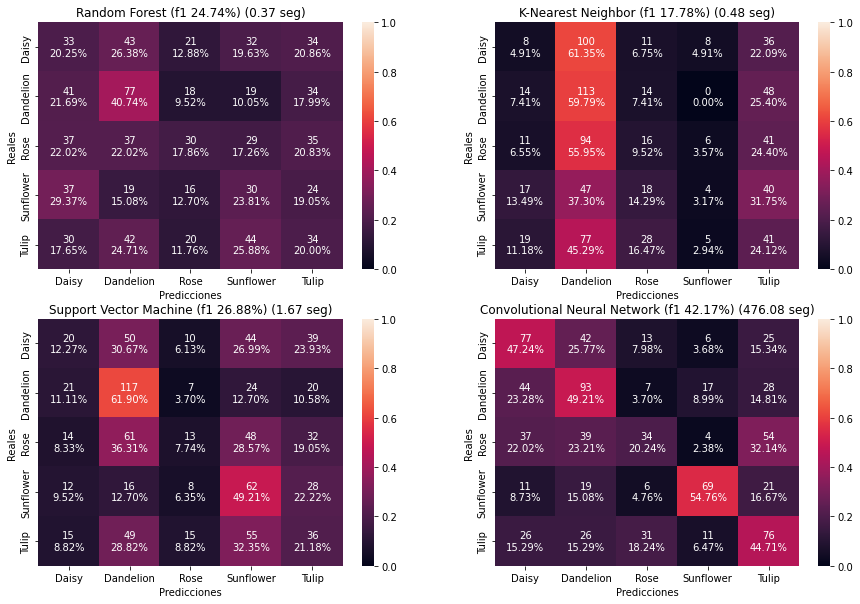

In [ ]:
#######################################
#funciones para importar y modificar las imágenes de entrada de los modelos
tamaño=100
import_and_resize(dir_categorias,dir_train,tamaño) #importar imagenes de un tamaño definido
#######################################
#funcion para definir colores RGB, BGR, HSV, LAB o filtros GABOR
color='GABOR'
convertir_color(imagenes_entrenamiento,color)
#######################################
#funcion para realizar partición entrenamiento y validación
part=0.3
particion(part,np.array(imagenes_entrenamiento2),labels)
#######################################
#funcion para realizar aumentacion
#trans=5 #cantidad de transformaciones en la aumentación
#aument='Si'
#ln=2718 #len(imagenes_train) #len(imagenes_train)
#aumentacion_2(imagenes_entrenamiento,trans,aument,part,tamaño,ln) #aumentacion de datos
#######################################
#funcion para reducir dimensiones
extr_car='Si'
num_car=500
if extr_car=='Si': #reduccion de dimensionones
  imagenes_train2d=funcion_pca(num_car,imagenes_train2d)
  imagenes_val2d=funcion_pca(num_car,imagenes_val2d)
#######################################
#funcion para realizar segmentacion
#segment='Si'
#segmentar2(imagenes_train,labels_train2d,2,segment)

#####################################
#gráfica de imagen de muestra luego de las condiciones anteriores
imgplot=imagenes_train[1]
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Ejemplo Imagen de entrada a los modelos')

########################################
#funcion para evaluar modelos
experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño)

## **Experimento 5**

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


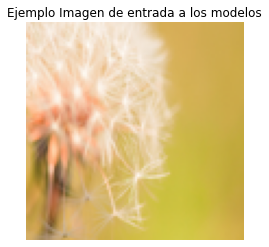

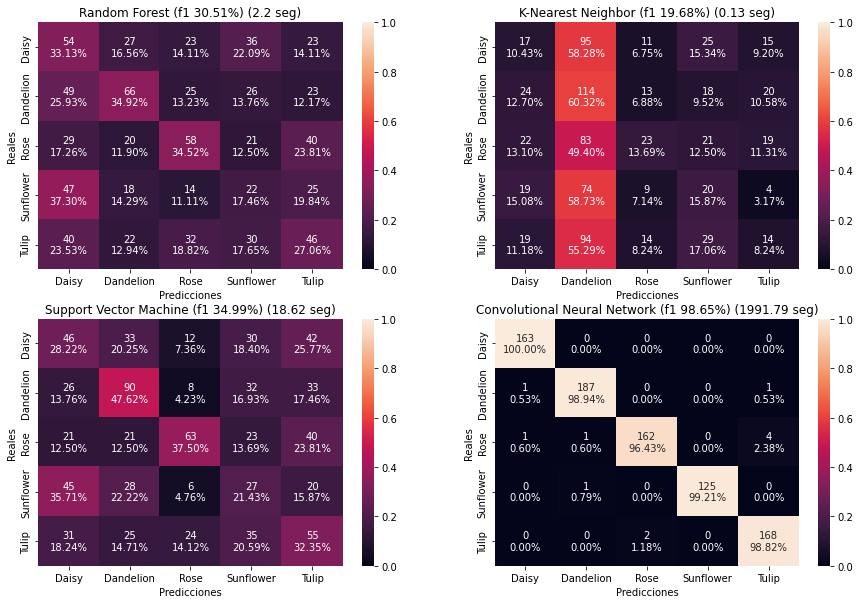

In [ ]:
#######################################
#funciones para importar y modificar las imágenes de entrada de los modelos
tamaño=100
import_and_resize(dir_categorias,dir_train,tamaño) #importar imagenes de un tamaño definido
#######################################
#funcion para definir colores RGB, BGR, HSV, LAB o filtros GABOR
color='RGB'
convertir_color(imagenes_entrenamiento,color)
#######################################
#funcion para realizar partición entrenamiento y validación
part=0.3
particion(part,np.array(imagenes_entrenamiento2),labels)
#######################################
#funcion para realizar aumentacion
trans=2 #cantidad de transformaciones en la aumentación
aument='Si'
ln=2700 #len(imagenes_train) #len(imagenes_train)
aumentacion_2(imagenes_entrenamiento,trans,aument,part,tamaño,ln) #aumentacion de datos
#######################################
#funcion para reducir dimensiones
extr_car='Si'
num_car=500
if extr_car=='Si': #reduccion de dimensionones
  imagenes_train2d=funcion_pca(num_car,imagenes_train2d)
  imagenes_val2d=funcion_pca(num_car,imagenes_val2d)
#######################################
#funcion para realizar segmentacion
#segment='Si'
#segmentar2(imagenes_train,labels_train2d,2,segment)

#####################################
#gráfica de imagen de muestra luego de las condiciones anteriores
imgplot=imagenes_train[1]
plt.imshow(imgplot,cmap = plt.cm.gray)
plt.axis('off')
plt.title('Ejemplo Imagen de entrada a los modelos')

########################################
#funcion para evaluar modelos
experimento(rf,knn,svm,imagenes_train2d,labels_train2d,imagenes_train,labels_train,imagenes_val,labels_val,imagenes_val2d,labels_val2d,tamaño)

# **Prediccion**

Text(0.5, 1.0, 'Prediccion: tulip')

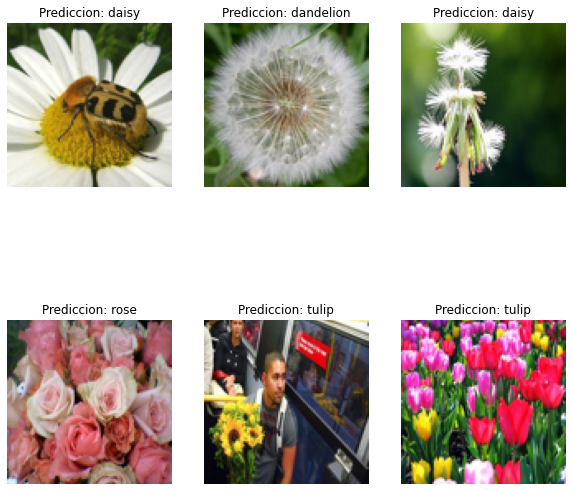

In [ ]:
#se realiza predicción usando los datos de test (datos que los modelos nunca han visto)
y_pred_val = cnn.predict(imagenes_test)
rows = 2
columns = 3
fig = plt.figure(figsize=(10, 10))  

n=50
fig.add_subplot(rows, columns, 1)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

n=90
fig.add_subplot(rows, columns, 2)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

n=30
fig.add_subplot(rows, columns, 3)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

n=430
fig.add_subplot(rows, columns, 4)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

n=45
fig.add_subplot(rows, columns, 5)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

n=600
fig.add_subplot(rows, columns, 6)
plt.imshow(imagenes_test[n])
plt.axis('off')
titulo='Prediccion: ' + str(flor2(np.argmax(y_pred_val[n])))
plt.title(titulo)

# **Conclusiones**


  - La metodología propuesta permitió entrenar y evaluar 4 modelos de Machine Learning, en este proceso se evidenció la importancia de la calidad del dataset utilizado a la hora de identificar los tipos de flores, así como el efecto que se puede conseguir mediante la gestión adecuada de las imágenes en las diferentes etapas de un sistema de visión artificial. 
  - Se evidencia la aplicabilidad de la inteligencia artificial en el sector floricultor, las flores son un producto de exportación de suma importancia en Colombia, según informes presentados por el Ministerio de Agricultura entre 2019-2020, aportó cerca del 17% del impuesto de renta del agro colombiano, además, cerca del 95% de la producción se exporta, lo cual le da un enfoque optimista en el mercado internacional.
  - El ambiente no controlado de las fotos influye en la precisión de los modelos, al realizar un barrido en el dataset de imágenes que generaban ruido, la precisión de los modelos aumentó.
